# Chapter 3 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import random
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pingouin as pg
import matplotlib.pyplot as plt
import mistat

# Statistical Inference and Bootstrapping

## Sampling Characteristics of Estimators

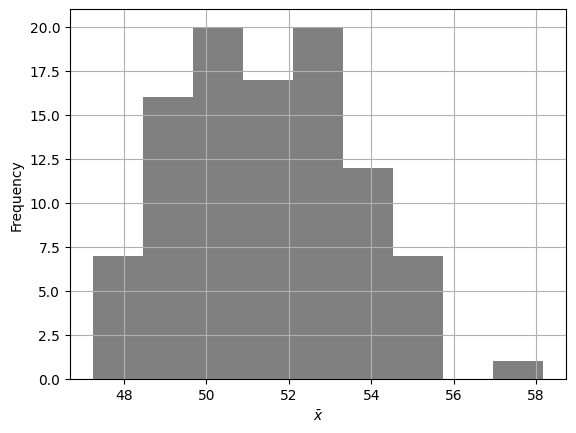

In [3]:
# The book figure was created using a different bootstrapping code and therefore looks different.
np.random.seed(seed=1)

x = stats.norm(loc=50, scale=25).rvs(100)
ci, mean_results = pg.compute_bootci(x, func=np.mean, n_boot=100, return_dist=True, seed=1)

ax = pd.Series(mean_results).hist(bins=9, color='grey')
ax.set_xlabel(r'$\bar{x}$')
ax.set_ylabel('Frequency')
plt.show()

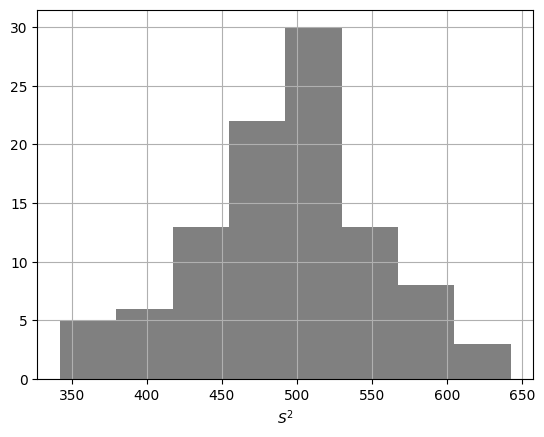

In [4]:
# The book figure was created using a different bootstrapping code and therefore looks different.
B = pg.compute_bootci(x, func=np.var, n_boot=100, return_dist=True, seed=1)

ax = pd.Series(B[1]).hist(bins=8, color='grey')
ax.set_xlabel(r'$S^2$')
plt.show()

## Some Methods of Point Estimation

### Moment Equation Estimators

### The Method of Least Squares

### Maximum Likelihood Estimators

## Comparison of Sample Estimates

### Basic Concepts

In [5]:
data = []
for x in range(11):
  data.append({
    'x': x,
    'p10': stats.binom.cdf(x, 20, 0.10),
    'p15': stats.binom.cdf(x, 20, 0.15),
    'p20': stats.binom.cdf(x, 20, 0.20),
    'p25': stats.binom.cdf(x, 20, 0.25),
  })
df = pd.DataFrame(data)

In [6]:
df.round(4)

,x,p10,p15,p20,p25
0,0,0.1216,0.0388,0.0115,0.0032
1,1,0.3917,0.1756,0.0692,0.0243
2,2,0.6769,0.4049,0.2061,0.0913
3,3,0.8670,0.6477,0.4114,0.2252
4,4,0.9568,0.8298,0.6296,0.4148
5,5,0.9887,0.9327,0.8042,0.6172
6,6,0.9976,0.9781,0.9133,0.7858
7,7,0.9996,0.9941,0.9679,0.8982
8,8,0.9999,0.9987,0.9900,0.9591
9,9,1.0000,0.9998,0.9974,0.9861


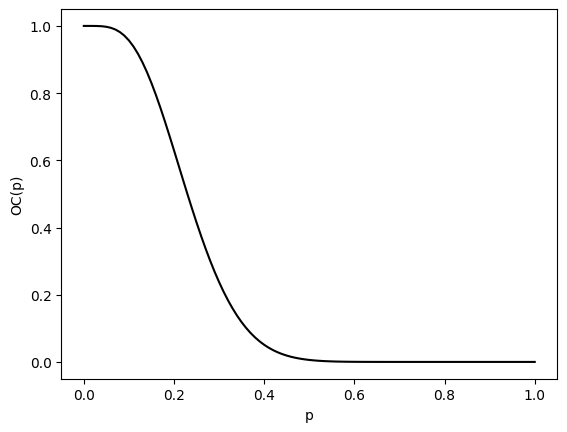

In [7]:
from mistat.acceptanceSampling import OperatingCharacteristics2c
X = OperatingCharacteristics2c(20, 4, oc_type='binomial')
df = pd.DataFrame({'p': X.pd, 'OC(p)': X.paccept})
ax = df.plot(x='p', y='OC(p)', legend=False, color='black')
ax.set_ylabel('OC(p)')
plt.show()

### Some Common One-Sample Tests of Hypotheses

#### The $Z$-test:  Testing the Mean of a Normal Distribution, $\sigma^2$ Known

/tmp/ipykernel_156/2974964196.py:27: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(-4.2, 4,2)


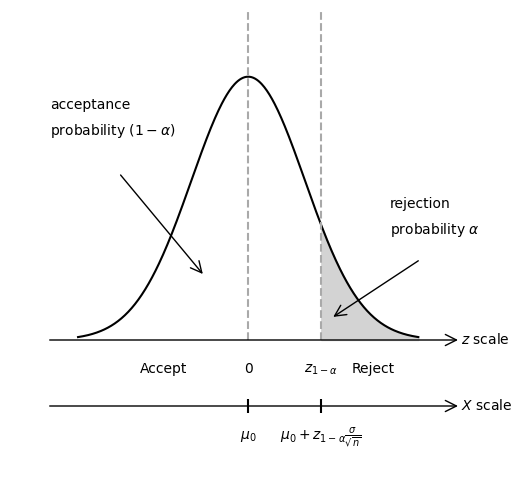

In [8]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=[6, 6])
ax.plot(x, y, c='black')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}

zma = stats.norm.ppf(0.9)
ax.fill_between(x[x>zma], y[x>zma], color="lightgrey")
ax.vlines([0, zma], ymin=0, ymax=0.5, linestyles='--', color='darkgrey')
ax.vlines([0, zma], ymin=-0.11, ymax=-0.09, linestyles='-', color='black')

plt.annotate("", xy=(3.7, 0), xytext=(-3.5, 0), arrowprops=prop)
plt.annotate("", xy=(3.7, -0.1), xytext=(-3.5, -0.1), arrowprops=prop)
ax.text(3.75, 0, r'$z$ scale', verticalalignment='center')
ax.text(3.75, -0.1, r'$X$ scale', verticalalignment='center')

plt.annotate("", xy=(-0.8, 0.1), xytext=(-2.25,0.25), arrowprops=prop)
ax.text(-3.5, 0.35, r'acceptance')
ax.text(-3.5, 0.31, r'probability $(1-\alpha)$')
plt.annotate("", xy=(1.5, 0.035), xytext=(3,0.12), arrowprops=prop)
ax.text(2.5, 0.2, r'rejection')
ax.text(2.5, 0.16, r'probability $\alpha$')

ax.set_xlim(-4.2, 4,2)
ax.set_ylim(-0.2, 0.5)

options = {'horizontalalignment': 'center'}
ax.text(-1.5, -0.05, 'Accept', **options)
ax.text(2.2, -0.05, 'Reject', **options)
ax.text(0, -0.05, '0', **options)
ax.text(zma, -0.05, r'$z_{1-\alpha}$', **options)

# options = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
ax.text(0, -0.15, r'$\mu_0$', **options)
ax.text(zma, -0.152, r'$\mu_0 + z_{1-\alpha} \frac{\sigma}{\sqrt{n}}$', **options)

plt.axis('off')
plt.show()

In [9]:
data = []
n = 100
mu0 = 5
sigma = 0.2
alpha = 0.05
for mu in (5, 5.01, 5.02, 5.03, 5.04, 5.05):
  dsn = np.sqrt(n) * (mu - mu0) / sigma
  z  = stats.norm.ppf(1-alpha) - dsn
  data.append({
    'mu': mu,
    'dsn': dsn,
    'z': z,
    'OC': stats.norm.cdf(z),
  })
df = pd.DataFrame(data)

In [10]:
df.round(4)

,mu,dsn,z,OC
0,5.00,0.0,1.6449,0.9500
1,5.01,0.5,1.1449,0.8739
2,5.02,1.0,0.6449,0.7405
3,5.03,1.5,0.1449,0.5576
4,5.04,2.0,-0.3551,0.3612
5,5.05,2.5,-0.8551,0.1962


#### The $t$-Test:  Testing the Mean of a Normal Distribution, $\sigma^2$ Unknown

#### The Chi-Squared Test:  Testing the Variance of a Normal Distribution

#### Testing Hypotheses About the Success Probability, $p$, in Binomial Trials

In [11]:
stats.binom(20, 0.2).ppf(0.95)

7.0

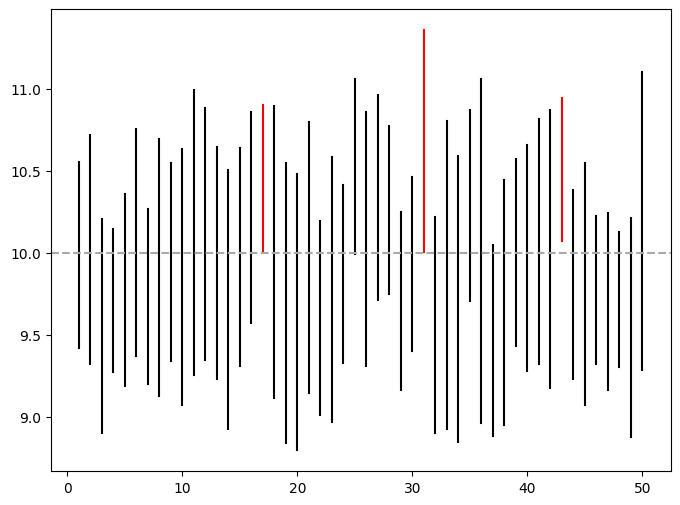

In [12]:
np.random.seed(seed=7) # bootstrapped uses numpy to create random numbers

df = pd.DataFrame({'x': stats.norm(loc=10, scale=1).rvs(500)})

model = smf.ols(formula='x ~ 1', data=df[1:10]).fit()
model.conf_int(alpha=0.05).loc['Intercept', :]

confIntervals = []
for _ in range(50):
    df_sample = df.sample(10, replace=True)
    model = smf.ols(formula='x ~ 1', data=df_sample).fit()
    confIntervals.append(list(model.conf_int(alpha=0.05).loc['Intercept', :]))

fig, ax = plt.subplots(figsize=[8, 6])
for repeat, (lower, upper) in enumerate(confIntervals, 1):
    ax.plot([repeat, repeat], [lower, upper], color='black' if lower < 10 < upper else 'red')
ax.axhline(10, linestyle='--', color='darkgrey')
plt.show()

nrCoverConfIntervals = sum(lower <= 10 <= upper for lower, upper in confIntervals)

## Confidence Intervals

### Confidence Intervals for $\mu$; $\sigma$ Known

### Confidence Intervals for $\mu$; $\sigma$ Unknown

### Confidence Intervals for $\sigma^2$

### Confidence Intervals for $p$

## Tolerance Intervals

### Tolerance Intervals for the Normal Distributions

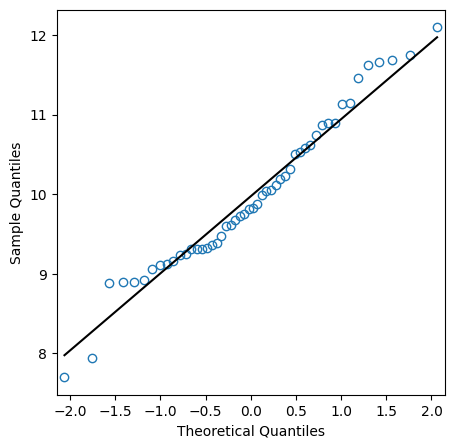

In [13]:
np.random.seed(1)
x = stats.norm(loc=10, scale=1).rvs(50)

fig, ax = plt.subplots(figsize=[5, 5])
sm.qqplot(x, line='s', ax=ax)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
plt.show()

## Testing for Normality with Probability Plots

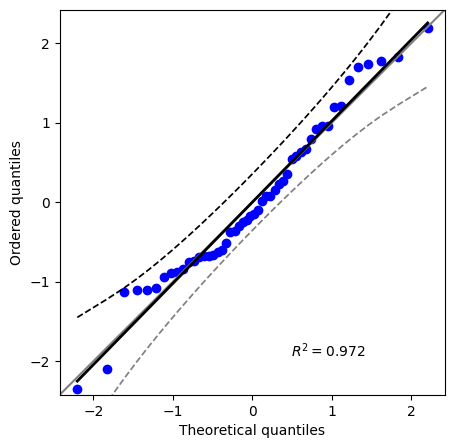

In [14]:
np.random.seed(1)
x = stats.norm(loc=10, scale=1).rvs(50)
fig, ax = plt.subplots(figsize=[5, 5])
pg.qqplot(x, ax=ax)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()

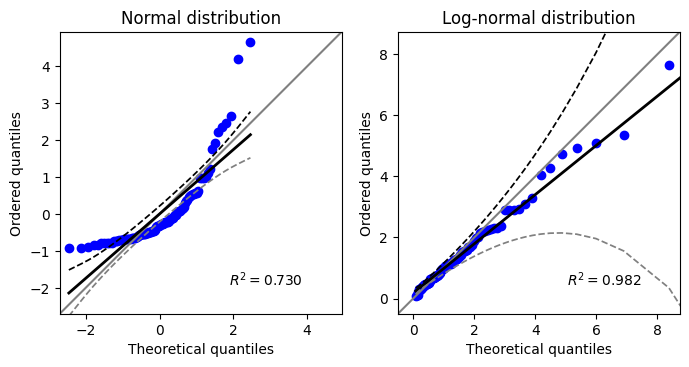

In [15]:
np.random.seed(1)
x = stats.lognorm.rvs(1, size=100)

fig, axes = plt.subplots(figsize=[8, 4], ncols=2)
pg.qqplot(x, ax=axes[0])
axes[0].set_title('Normal distribution')
pg.qqplot(x, dist=stats.lognorm, sparams=[1], ax=axes[1])
axes[1].set_title('Log-normal distribution')
for ax in axes:
  ax.get_lines()[0].set_color('grey')
  ax.get_lines()[0].set_markerfacecolor('none')
  ax.get_lines()[1].set_color('black')
  ax.get_lines()[2].set_color('black')
  ax.get_lines()[3].set_color('grey')
  # ax.get_lines()[4].set_color('grey')
plt.show()
res = stats.probplot(x)
r2_normal = res[1][2] ** 2
res = stats.probplot(x, dist=stats.lognorm, sparams=[1])
r2_lognormal = res[1][2] ** 2

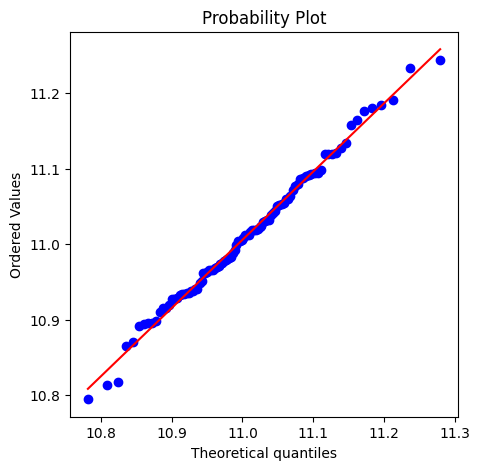

In [16]:
np.random.seed(1)
dist=stats.lognorm(s=0.1,loc=10)
x = dist.rvs(100)

fig, ax = plt.subplots(figsize=[5, 5])
stats.probplot(x, dist=stats.lognorm, sparams=[0.1, 10, 1], plot=ax)
plt.show()

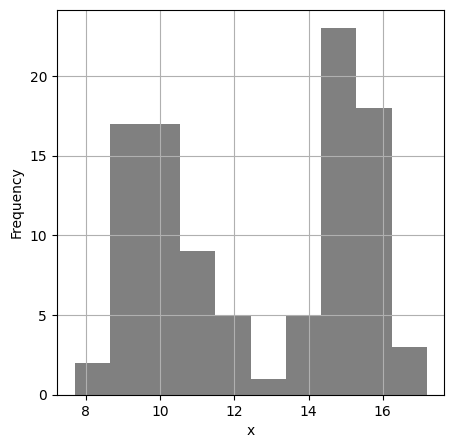

In [17]:
np.random.seed(1)
x = np.array([*stats.norm.rvs(loc=10, size=50), *stats.norm.rvs(loc=15, size=50)])

fig, ax = plt.subplots(figsize=[5, 5])
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
pd.Series(x).hist(bins=10, color='grey')
plt.show()

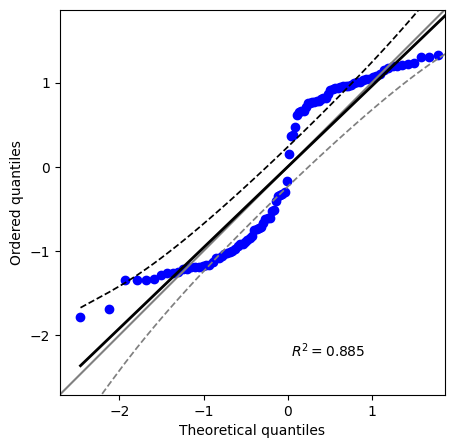

In [18]:
np.random.seed(1)
x = np.array([*stats.norm.rvs(loc=10, size=50), *stats.norm.rvs(loc=15, size=50)])

fig, ax = plt.subplots(figsize=[5, 5])
pg.qqplot(x, ax=ax)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()

res = stats.probplot(x)
r2_normal = res[1][2] ** 2

## Tests of Goodness of Fit

### The Chi-Square Test (Large Samples)

### The Kolmogorov-Smirnov Test

In [19]:
oturb = mistat.load_data('OTURB')

result = stats.kstest(oturb, 'norm',
          args=(np.mean(oturb), np.std(oturb, ddof=1)),
          alternative='two-sided')

## Bayesian Decision Procedures

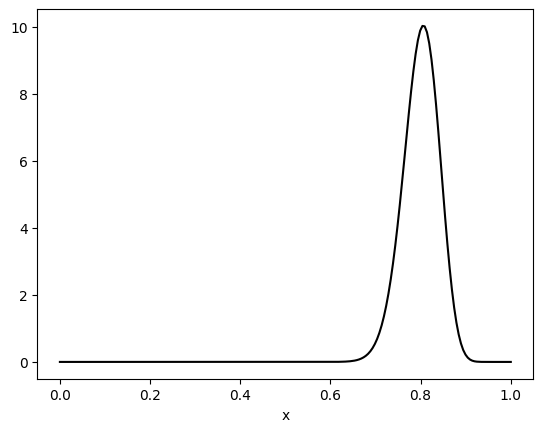

In [20]:
x = np.linspace(0, 1.0, 200)
df = pd.DataFrame({
    'x': x,
    'p.d.f.': stats.beta(a=80, b=20).pdf(x),
})
ax = df.plot(x='x', y='p.d.f.', legend=False, color='black')
plt.show()

### Prior and Posterior Distributions

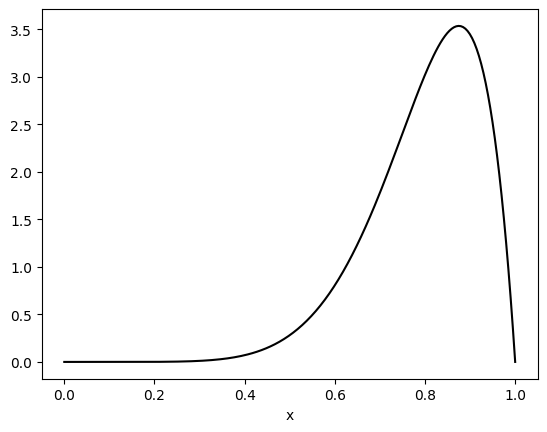

In [21]:
x = np.linspace(0, 1.0, 200)
df = pd.DataFrame({
    'x': x,
    'p.d.f.': stats.beta(a=8, b=2).pdf(x),
})
ax = df.plot(x='x', y='p.d.f.', legend=False, color='black')
plt.show()

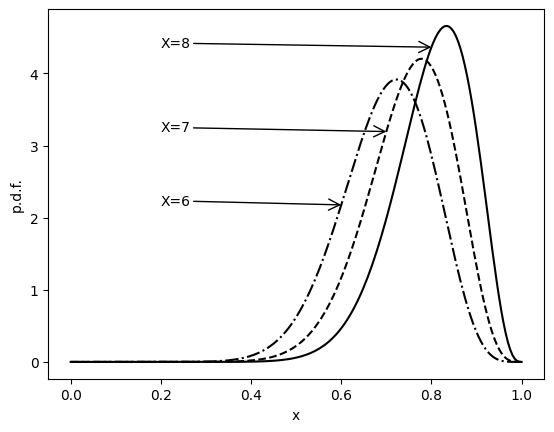

In [22]:
x = np.linspace(0, 1.0, 200)
df = pd.DataFrame({
    'x': x,
    'dist1': stats.beta(a=8 + 8, b=2 + 2).pdf(x),
    'dist2': stats.beta(a=8 + 7, b=2 + 3).pdf(x),
    'dist3': stats.beta(a=8 + 6, b=2 + 4).pdf(x),
})
ax = df.plot(x='x', y='dist1', legend=False, color='black')
df.plot(x='x', y='dist2', legend=False, color='black', ax=ax, linestyle='--')
df.plot(x='x', y='dist3', legend=False, color='black', ax=ax, linestyle='-.')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}
def arrow(text, xvalue, offset):
    y = stats.beta(a=8+8-offset, b=2+2+offset).pdf(xvalue)
    plt.annotate(text, xy=(xvalue, y), xytext=(0.2, y), arrowprops=prop)
arrow('X=8', 0.8, 0)
arrow('X=7', 0.7, 1)
arrow('X=6', 0.6, 2)
ax.set_ylabel('p.d.f.')
plt.show()

### Bayesian Testing and Estimation

#### Bayesian Testing

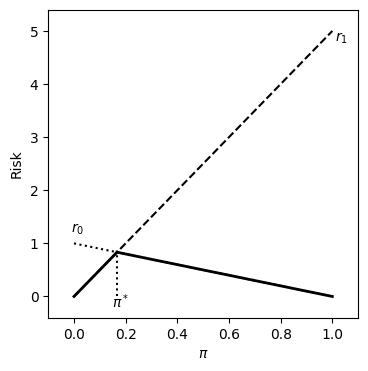

In [23]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.set_xlabel('$\pi$')
ax.set_ylabel('Risk')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.4, 5.4)
ax.plot([0,1], [0,5], linestyle='--', color='black')
ax.plot([0,1], [1,0], linestyle=':', color='black')
ax.plot([1/6,1/6], [0,5*1/6], linestyle=':', color='black')
ax.plot([0,1/6], [0,5*1/6], linewidth=2, color='black')
ax.plot([1/6, 1], [5*1/6, 0], linewidth=2, color='black')
ax.text(-0.01, 1.2, '$r_0$')
ax.text(1.01, 4.8, '$r_1$')
ax.text(1/6-0.02, -0.21, '$\pi^*$')
plt.show()
#lines(rep(1/6, 2), c(0, 5*1/6), lty="dashed")
#lines(c(0, 1/6), c(0, 5*1/6), lwd=2)
#lines(c(1/6, 1), c(5*1/6, 0), lwd=2)

#### Bayesian Estimation

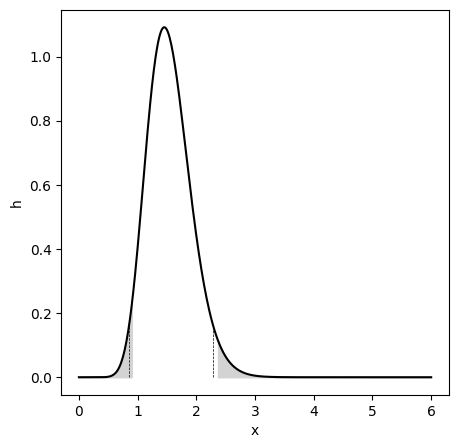

In [24]:
n = 10
sum_x = 15
V0 = 2
B0 = 1
V1 = V0 + sum_x
B1 = B0 / (1 + n * B0)

x = np.linspace(0, 6, 401)
y_prior = stats.gamma.pdf(x, a=V0, scale=B0)
y = stats.gamma.pdf(x, a=V1, scale=B1)

conf_x = B1/2 * stats.chi2.ppf([0.025, 0.975], 2 * V1)

fig, ax = plt.subplots(figsize=[5, 5])
# ax.plot(x, y_prior, c='lightgrey')
ax.plot(x, y, c='black')

ax.fill_between(x[x<conf_x[0]], y[x<conf_x[0]], color="lightgrey")
ax.fill_between(x[x>conf_x[1]], y[x>conf_x[1]], color="lightgrey")
ax.set_xlabel('x')
ax.set_ylabel('h')

ax.plot([0.86, 0.86], [0, stats.gamma.pdf(0.86, a=V1, scale=B1)], 
        color='black', lw=0.5, ls='--')
ax.plot([2.29, 2.29], [0, stats.gamma.pdf(2.29, a=V1, scale=B1)], 
        color='black', lw=0.5, ls='--')
plt.show()

### Credibility Intervals For Real Parameters

## Random Sampling From Reference Distributions

In [25]:
random.seed(1)

# Create a population of 90 0s and 10 1s
population = [0] * 90
population.extend([1] * 10)

proportions = []
for m in range(1000):
  # sample 50 values from population using RSWR
  sample = random.choices(population, k=50)
  # keep the mean of the sample
  proportions.append(np.mean(sample))

In [26]:
from collections import Counter
from pprint import pprint

frequencies = Counter(proportions)
pprint(sorted(frequencies.items()))

[(0.0, 7),
 (0.02, 24),
 (0.04, 76),
 (0.06, 123),
 (0.08, 176),
 (0.1, 193),
 (0.12, 150),
 (0.14, 110),
 (0.16, 80),
 (0.18, 35),
 (0.2, 17),
 (0.22, 9)]


In [27]:
random.seed(1)

# Load the dataset
X = mistat.load_data('ALMPIN')['lenWcp']
Y = X - np.mean(X) + 60.1

means = []
for m in range(1000):
  # sample 70 values from population using RSWR
  sample = random.choices(Y, k=70)
  # keep the mean of the sample
  sample_mean = np.mean(sample)
  means.append(0.005 * round(sample_mean/0.005))

quant_001 = np.quantile(means, 0.01)

In [28]:
counts = sorted(Counter(means).items())
for k, v in counts:
  print(f'{k:.3f}   {v}')

60.080   1
60.085   9
60.090   78
60.095   230
60.100   350
60.105   239
60.110   79
60.115   12
60.120   2


## Bootstrap Sampling

### The Bootstrap Method

In [29]:
etchrate = mistat.load_data('ETCHRATE')

B = pg.compute_bootci(etchrate, func=np.mean, n_boot=1000,
                      confidence=0.95, return_dist=True, seed=1)

ci, distribution = B
print(f' Mean: {np.mean(distribution)}')
print(f' 95%-CI: {ci[0]:.1f} - {ci[1]:.1f}')

 Mean: 508.4435
 95%-CI: 480.3 - 534.7


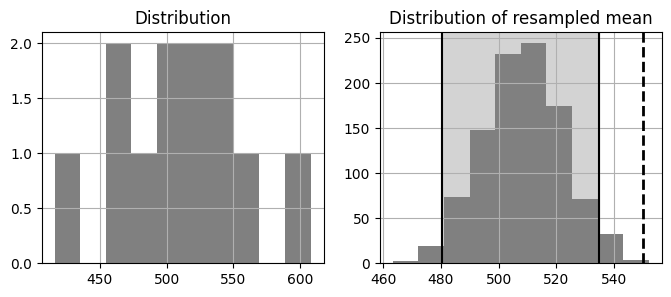

In [30]:
fig, axes = plt.subplots(figsize=[8, 3], ncols=2)
etchrate.hist(ax=axes[0], color='grey')
axes[1].axvspan(*ci, color='lightgrey')
pd.Series(distribution).hist(ax=axes[1], color='grey')
axes[0].set_title('Distribution')
axes[1].set_title('Distribution of resampled mean')
axes[1].axvline(ci[0], color='black')
axes[1].axvline(ci[1], color='black')
axes[1].axvline(550, color='black', linewidth=2, linestyle='--')
plt.show()

### Examining the Bootstrap Method

### Harnessing The Bootstrap Method

## Bootstrap Testing of Hypotheses

### Bootstrap Testing and Confidence Intervals for the Mean

### Studentized Test For the Mean

In [31]:
hybrid1 = mistat.load_data('HYBRID1')

ci = pg.compute_bootci(hybrid1, func='mean', n_boot=500,
                       confidence=0.95, method='per', seed=1)
print('bootstrap: ', ci)
print()

print(stats.ttest_1samp(hybrid1, 2150))
n = len(hybrid1) - 1
t_test_confinterval = stats.t.interval(0.95, n, loc=np.mean(hybrid1),
  scale=np.std(hybrid1)/np.sqrt(n))
print('t-test 95% conf-interval', t_test_confinterval)
print()

# get distribution of bootstrapped pvalues and determine percentage of
# values less than pvalue calculated from ttest_1samp
def stat_func(x):
    return stats.ttest_1samp(x, 2150).pvalue

ci, dist = pg.compute_bootci(hybrid1, func=stat_func, n_boot=500,
                       confidence=0.95, method='per',
                       seed=1, return_dist=True)
sum(dist < stats.ttest_1samp(hybrid1, 2150).pvalue) / len(dist)

bootstrap:  [2111.68 2176.32]

TtestResult(statistic=-0.3743199001200656, pvalue=0.7107146634282755, df=31)
t-test 95% conf-interval (2107.4796487616936, 2179.3328512383064)



0.708

### Studentized Test for The Difference of Two Means

In [32]:
random.seed(1)
hybrid2 = mistat.load_data('HYBRID2')
X = hybrid2['hyb1']
Y = hybrid2['hyb2']
Xbar = np.mean(X)
Ybar = np.mean(Y)
SX = np.std(X, ddof=1)
SY = np.std(Y, ddof=1)
print(f'Xbar {Xbar:.2f} / SX {SX:.3f}')
print(f'Ybar {Ybar:.2f} / SY {SY:.3f}')

def stat_func(x, y):
    return stats.ttest_ind(x, y, equal_var=False).statistic

tstar = []
for _ in range(500):
    Xstar = np.array(random.choices(X, k=len(X))) - Xbar
    Ystar = np.array(random.choices(Y, k=len(Y))) - Ybar
    tstar.append(stat_func(Xstar, Ystar))

# calculate confidence interval for t* and D*
alpha = 0.05
tstar_ci = np.quantile(tstar, [alpha/2, 1-alpha/2])
Dstar_ci = Xbar - Ybar + np.sqrt(SX**2/len(X) + SY**2/len(Y))*tstar_ci

print('tstar-CI', tstar_ci)
print('Dstar-CI', Dstar_ci)

t0 = stat_func(X, Y)
print(f't0 {t0:.3f}')
pstar = (sum(tstar < -abs(t0)) + sum(abs(t0) < tstar)) / len(tstar)
print(f'P*-value {pstar:.2f}')

Xbar 2143.41 / SX 99.647
Ybar 1902.81 / SY 129.028
tstar-CI [-2.26597133  1.99806399]
Dstar-CI [175.28976673 298.17679872]
t0 8.348
P*-value 0.00


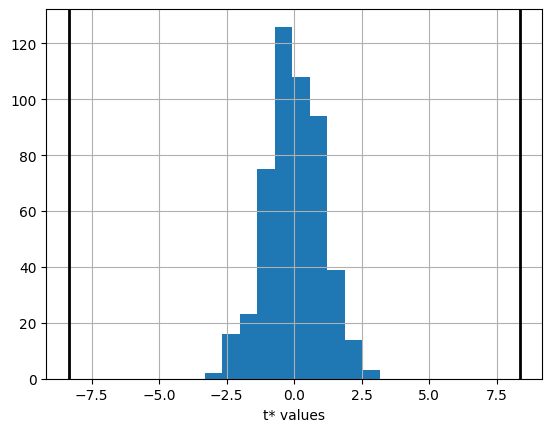

In [33]:
ax = pd.Series(tstar).hist()
ax.axvline(t0, color='black', lw=2)
ax.axvline(-t0, color='black', lw=2)
ax.set_xlabel('t* values')
plt.show()

### Bootstrap Tests and Confidence Intervals for the Variance

In [34]:
# create random sample with standard deviation 24.8
from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(seed=150)
X = stats.norm.rvs(scale=20, size=20)
S20 = np.std(X, ddof=1)
print(f'S20 = {S20:.3f}')

random.seed(1)
sigma0 = 20
GM = []
for _ in range(500):
    Xstar = random.choices(X, k=20)
    GM.append(np.std(Xstar, ddof=1)**2)

Pstar = sum(GM > (S20**2/sigma0)**2) / len(GM)
print(S20**2/sigma0)
print(f'Pstar = {Pstar:.3f}')

alpha=0.05
ci = np.quantile(GM, [alpha/2, 1-alpha/2])
print(f'0.95-ci [{ci[0]}, {ci[1]}]')

# chi2 confidence limit
n = 20
ci = (n-1)*S20**2 / stats.chi2.ppf([1-alpha/2, alpha/2], n-1)
print(f'chi2-ci [{ci[0]}, {ci[1]}]')

# bootstrapped based
GMquant = np.quantile(GM, [1-alpha/2, alpha/2])
ci = S20**4 / GMquant
print(f'boot-ci [{ci[0]}, {ci[1]}]')

S20 = 24.837
30.843882606534628
Pstar = 0.016
0.95-ci [282.1441534165316, 931.7079647027307]
chi2-ci [356.7685004417997, 1315.9662831350934]
boot-ci [408.4305942578152, 1348.7362154780665]


### Comparing Statistics of Several Samples

#### Comparing Variances of Several Samples

In [35]:
hybrid = mistat.load_data('HYBRID')

# variance for each column
S2 = hybrid.var(axis=0)
F0 = max(S2) / min(S2)
print('S2', S2)
print('F0', F0)

# Step 1: sample variances of bootstrapped samples for each column
B = {}
for seed, column in enumerate(hybrid.columns):
    B[column] = pg.compute_bootci(hybrid[column], func='var', n_boot=500,
                       confidence=0.95, seed=seed, return_dist=True)
Bt = pd.DataFrame({column: B[column][1] for column in hybrid.columns})

# Step 2: compute Wi
Wi = Bt / S2

# Step 3: compute F*
FBoot = Wi.max(axis=1) / Wi.min(axis=1)
FBoot95 = np.quantile(FBoot, 0.95)
print('FBoot 95%', FBoot95)
print('ratio', sum(FBoot >= F0)/len(FBoot))

S2 hyb1     9929.539315
hyb2    16648.350806
hyb3    21001.007056
dtype: float64
F0 2.1150031629110884
FBoot 95% 2.370310962512835
ratio 0.104


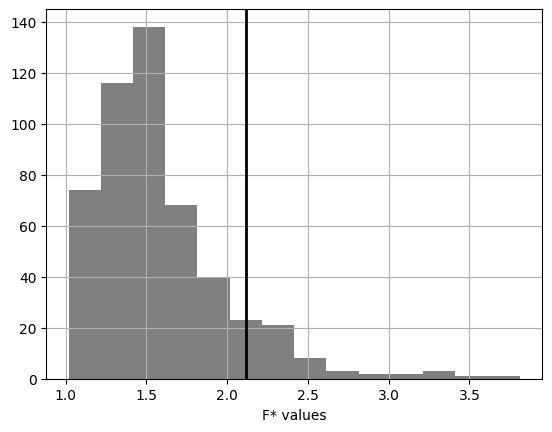

In [36]:
ax = pd.Series(FBoot).hist(bins=14, color='grey')
ax.axvline(F0, color='black', lw=2)
ax.set_xlabel('F* values')
plt.show()

#### Comparing Several Means:  The One-Way Analysis of Variance

F = 50.333


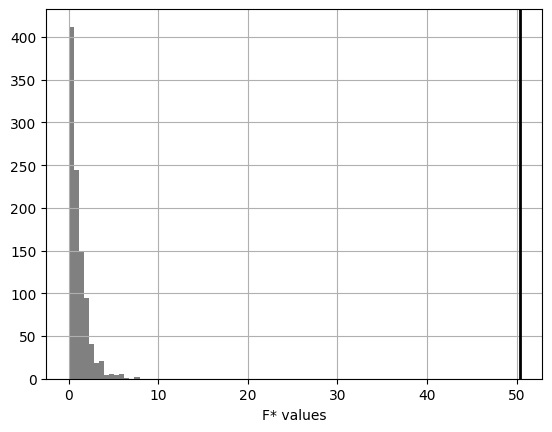

In [37]:
hybrid = mistat.load_data('HYBRID')
hybrid_long = pd.melt(hybrid, value_vars=hybrid.columns)

def test_statistic_F(samples):
    ''' Calculate test statistic F from samples '''
    k = len(samples)
    Ni = np.array([len(sample) for sample in samples])
    N = np.sum(Ni)
    XBni = np.array([np.mean(sample) for sample in samples])
    S2ni = np.array([np.var(sample, ddof=1) for sample in samples])
    XBB = np.sum(Ni * XBni) / N
    Sn = np.sum(Ni*(XBni - XBB)**2) / (k-1)
    Sd = np.sum((Ni-1)*S2ni) / (N-1)
    F0 = Sn / Sd
    return F0, XBni, XBB

samples = [hybrid['hyb1'], hybrid['hyb2'], hybrid['hyb3']]
F0, XBni, XBB = test_statistic_F(samples)
DB = XBni - XBB
print(f'F = {F0:.3f}')

Ns = 1000
Fstar = []
for _ in range(Ns):
    Ysamples  = []
    for sample, DBi in zip(samples, DB):
        Xstar = np.array(random.choices(sample, k=len(sample)))
        Ystar = Xstar - DBi
        Ysamples.append(Ystar)
    Fs = test_statistic_F(Ysamples)[0]
    Fstar.append(Fs)

ax = pd.Series(Fstar).hist(bins=14, color='grey')
ax.axvline(F0, color='black', lw=2)
ax.set_xlabel('F* values')
plt.show()

In [38]:
def test_statistic_F(samples):
    return stats.f_oneway(*samples).statistic

F0 = test_statistic_F(samples)
print(f'F = {F0:.3f}')

# Calculate sample shifts
Ni = np.array([len(sample) for sample in samples])
N = np.sum(Ni)
XBni = np.array([np.mean(sample) for sample in samples])
XBB = np.sum(Ni * XBni) / N
DB = XBni - XBB

Ns = 1000
Fstar = []
for _ in range(Ns):
    Ysamples  = []
    for sample, DBi in zip(samples, DB):
        Xstar = np.array(random.choices(sample, k=len(sample)))
        Ysamples.append(Xstar - DBi)
    Fs = test_statistic_F(Ysamples)
    Fstar.append(Fs)

F = 49.274


## Bootstrap Tolerance Intervals

### Bootstrap Tolerance Intervals For Bernoulli Samples

In [39]:
stats.binom.ppf([0.025, 0.975], 50, 0.1)

array([1., 9.])

In [40]:
oelect = mistat.load_data('OELECT')

elec_index = np.array([1 if 216 <= value <= 224 else 0
                       for value in oelect])

def qbinomBoot(x, p):
    return stats.binom.ppf(p, 100, p=x.mean())

B_025 = pg.compute_bootci(elec_index, func=lambda x: qbinomBoot(x, p=0.025),
                          n_boot=500, seed=1, return_dist=True)
B_975 = pg.compute_bootci(elec_index, func=lambda x: qbinomBoot(x, p=0.975),
                          n_boot=500, seed=1, return_dist=True)
tol_int = [np.quantile(B_025[1], 0.025),np.quantile(B_975[1], 0.975)]
print(f'Tolerance interval ({tol_int[0]}, {tol_int[1]})')


Tolerance interval (50.0, 85.0)


### Tolerance Interval for Continuous Variables

In [41]:
cyclt = mistat.load_data('CYCLT')
cyclt = [*cyclt, *cyclt]  # create a dataset of size 100 by duplication

def getQuantile(x, p):
    return np.quantile(x, p)

B_025 = pg.compute_bootci(cyclt, func=lambda x: getQuantile(x, p=0.025),
          n_boot=500, seed=1, return_dist=True)
B_975 = pg.compute_bootci(cyclt, func=lambda x: getQuantile(x, p=0.975),
          n_boot=500, seed=1, return_dist=True)
print('0.025%', np.quantile(B_025[1], 0.025))
print('0.975%', np.quantile(B_975[1], 0.975))

0.025% 0.175
0.975% 1.141


### Distribution Free Tolerance Intervals

## Nonparametric Tests

### The Sign Test

### The Randomization Test

In [42]:
from itertools import permutations

A = pd.Series([0.75, 0.60, 0.80, 1.5, 1.1, 1.8, ])
sum_groups = A.groupby(list('111222')).sum()
T1, T2 = sum_groups

assignments = []
for perm in sorted(set(permutations('111222'))):
  perm = list(perm)
  sum_groups = A.groupby(perm).sum()
  perm.append((sum_groups['2'] - sum_groups['1']) / 3)
  assignments.append(perm)
columns = list(A)
columns.append('D')
result = pd.DataFrame(assignments, columns=columns)

In [43]:
result

,0.75,0.6,0.8,1.5,1.1,1.8,D
0,1,1,1,2,2,2,0.750000
1,1,1,2,1,2,2,0.283333
2,1,1,2,2,1,2,0.550000
3,1,1,2,2,2,1,0.083333
4,1,2,1,1,2,2,0.150000
5,1,2,1,2,1,2,0.416667
6,1,2,1,2,2,1,-0.050000
7,1,2,2,1,1,2,-0.050000
8,1,2,2,1,2,1,-0.516667
9,1,2,2,2,1,1,-0.250000


In [44]:
oelect = mistat.load_data('OELECT')
oelect1 = mistat.load_data('OELECT1')

_ = mistat.randomizationTest(oelect, oelect1, np.mean,
                             aggregate_stats=lambda x: x[0] - x[1],
                             n_boot=500, seed=1)

Original stat is -10.721980
Original stat is at quantile 1 of 501 (0.20%)
Distribution of bootstrap samples:
 min: -4.94, median: 0.16,  max: 4.55


### The Wilcoxon Signed Rank Test

In [45]:
X = [0.188, 0.353, -0.257, 0.220, 0.168]
Y = [1.240, 1.821, 2.500, 2.319, 2.190]

print('Wilcoxon signed-rank test (unsuitable for ties)')
print(stats.ranksums(X, Y))
print('Mann-Whitney U test (suitable for ties)')
print(stats.mannwhitneyu(X, Y))

Wilcoxon signed-rank test (unsuitable for ties)
RanksumsResult(statistic=-2.6111648393354674, pvalue=0.009023438818080326)
Mann-Whitney U test (suitable for ties)
MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)


## Chapter Highlights

## Exercises